In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Load and normalize datasets
TrainingData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Train'
).map(lambda x, y: (x / 255, y))

TestingData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Test', shuffle=False  # Disable shuffling for testing data
).map(lambda x, y: (x / 255, y))

ValidationData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Validation'
).map(lambda x, y: (x / 255, y))

Found 1843 files belonging to 2 classes.
Found 437 files belonging to 2 classes.
Found 235 files belonging to 2 classes.


In [4]:
# Define the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
Model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
# Set up TensorBoard logging
LogDir = 'logs'
Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)

In [10]:
# Train the model
History = Model.fit(
    TrainingData,
    epochs=20,
    validation_data=ValidationData,
    callbacks=[Tensorboard_Callback]
)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 992ms/step - accuracy: 0.5916 - loss: 0.6824 - val_accuracy: 0.7830 - val_loss: 0.4047
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 56s 970ms/step - accuracy: 0.8379 - loss: 0.3448 - val_accuracy: 0.9447 - val_loss: 0.1558
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 57s 976ms/step - accuracy: 0.9537 - loss: 0.1188 - val_accuracy: 0.9702 - val_loss: 0.0924
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 57s 975ms/step - accuracy: 0.9807 - loss: 0.0445 - val_accuracy: 0.9745 - val_loss: 0.0617
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 57s 980ms/step - accuracy: 0.9876 - loss: 0.0382 - val_accuracy: 0.9787 - val_loss: 0.0390
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9979 - loss: 0.0156 - val_accuracy: 0.9660 - val_loss: 0.0559
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9745 - val_loss: 0.0592
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9

In [12]:
# Evaluate the model on the testing data
test_loss, test_accuracy = Model.evaluate(TestingData)
print(f"Test Accuracy: {test_accuracy:.2f}, Test Loss: {test_loss:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9540 - loss: 0.1473
Test Accuracy: 0.96, Test Loss: 0.18


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


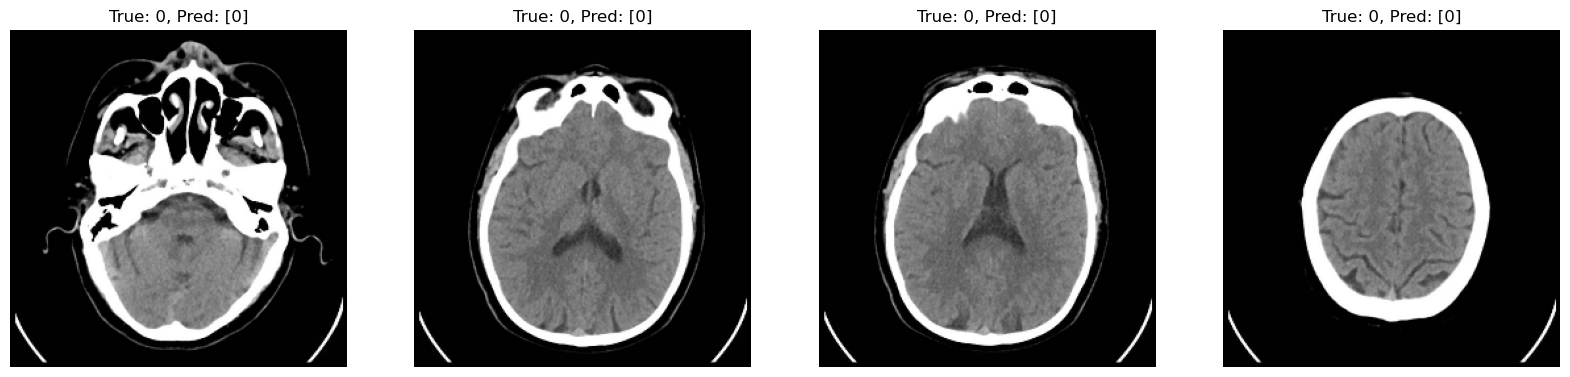

In [21]:
# Visualize predictions on a batch of testing data
DataIterator = TestingData.as_numpy_iterator()
Batch = DataIterator.next()

# Make predictions
predictions = Model.predict(Batch[0])

# Display images with predictions
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for idx in range(min(4, len(Batch[0]))):  # Ensure batch size is handled dynamically
    ax[idx].imshow(Batch[0][idx].astype(float))
    true_label = Batch[1][idx]
    predicted_label = (predictions[idx] > 0.5).astype(int)  # Convert probabilities to binary labels
    ax[idx].set_title(f'True: {true_label}, Pred: {predicted_label}')
    ax[idx].axis('off')

plt.show()

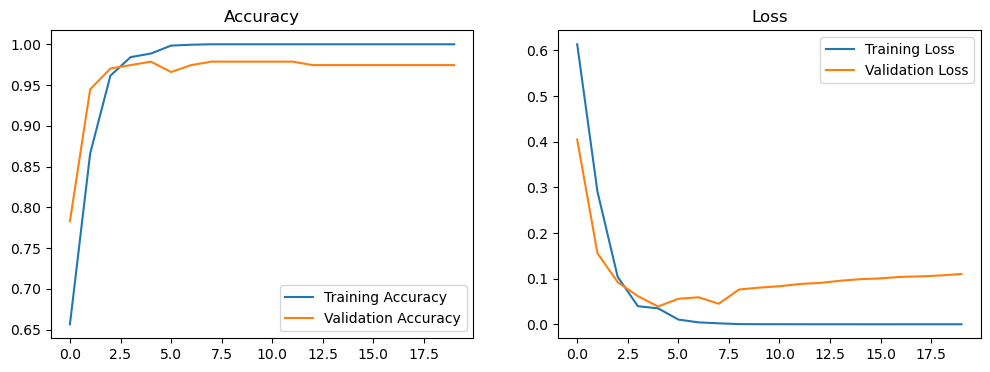

In [23]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()